<a href="https://colab.research.google.com/github/AzlinRusnan/Data_Management/blob/main/Bank_Turnover_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Turnover Analysis**
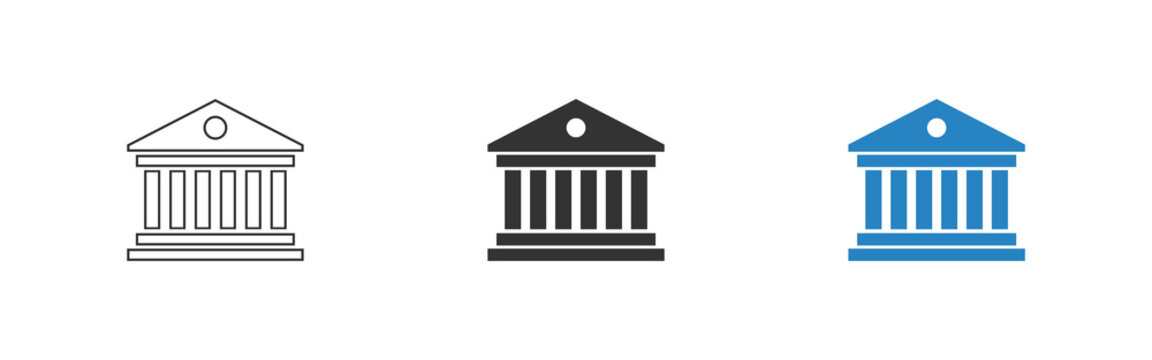

##**Problem Statement**:

Customer turnover, also known as customer attrition, is a critical metric that can significantly impact the revenue and profitability of a business, especially within the banking sector. Turnover occurs when customers stop using a company's services or products, leading to reduced customer base and revenue. Identifying the key factors that contribute to customer turnover and predicting which customers are likely to turnover becomes essential to take proactive measures to retain them and thus ensure the sustainability and growth of the business.

##**Project Overview**:

This project aims to analyze customer data from a banking institution to understand the patterns and predictors of turnover. By employing machine learning techniques, we will develop a predictive model that can identify customers at high risk of turning over. This model will help the bank's marketing and customer success teams to take targeted actions to improve customer retention. The dataset includes demographic information, account details, transaction data, and customer interaction records, which will be explored to glean insights and predict turnover.

##**Importing Libraries**


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score

##**Basic Understanding of the Dataset**
The source of the data is from https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

This dataset contains a compiled collection of bank customer data for analyzing customer turnover.

#### **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Management/Customer-Churn-Records.csv'
df = pd.read_csv(file_path)

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### **Checking the Dimensions of Dataset**

In [36]:
print("Total number of rows presents in the dataset is:",df.shape[0])
print("Total number of columns present in the dataset is:",df.shape[1])

Total number of rows presents in the dataset is: 10000
Total number of columns present in the dataset is: 18


#### **Checking the Columns Names**

In [37]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

##### **Columns Explanation:**


1.   RowNumber: Identification for each row.
2.   CustomerId: Identification for each customer that the Bank has or had.
3.   Surname: It provides information about the family name of each customer.
4.   CreditScore: It is a score assesses the creditworthiness of an individual based on their credit history and financial behavior.
5.   Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
6.   Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the turnover prediction.
7.   Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8.   Tenure: It typically represents the number of years or months the customer has been associated with the bank.
9.   Balance: It reflects the amount of money in the customer's bank account at a specific point in time.as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10.  NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
11.  HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
12.  IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
13.  EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing turnover behavior.
14.  Exited: It indicates whether a customer has turnover (1) or not (0) from the bank.
15.  Complain: It refers to customer has complaint or not.
16.  Satisfaction Score: It refers to the score provided by the customer for their complaint.
17.  Card Type: Type of card that customer hold(Diamond,Gold,Platinum,Silver)
18.  Points Earned: It is the point earned by customer for using credit card








#### **Checking Data Information**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

##### **Insight:**
The dataset contains 10,000 records across 18 columns, which include 15 numerical and 3 categorical columns.


#### **Checking the Total Number of Missing Values**

In [39]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


##### **Insight:**
As indicated by the table, there are no missing values; therefore, data imputation is not necessary.

#### **Checking for Duplicate Values**

In [40]:
duplicate_rows = df.duplicated().sum()
print("Insight: There is", duplicate_rows, "duplicate row in the dataset")

Insight: There is 0 duplicate row in the dataset


##**Data Wrangling**

#### **Showing Random Sample of the Data**

In [41]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
508,509,15773890,Okechukwu,733,France,Male,22,5,0.00,2,1,1,117202.19,0,0,3,DIAMOND,279
2688,2689,15728474,Chienezie,558,Germany,Male,32,4,108235.91,1,1,1,143783.28,0,0,4,DIAMOND,801
4292,4293,15800287,Micco,706,Spain,Female,46,2,127660.46,2,1,0,150156.82,1,1,2,PLATINUM,334


##### **Insight:**
RowNumber, CustomerId, and Surname appear irrelevant for predicting customer turnover. Therefore, we can safely remove these three columns from the analysis.

#### **Dropping Irrelevant Columns**

In [42]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [43]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


#### **Renaming Values in Exited Column**

In [44]:
df["Exited"].replace({0:"No",1:"Yes"},inplace=True)

In [45]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes,1,3,DIAMOND,377


##### **Insight:**

For this report, since we need to check and compare other variables with the Exited column, we decided to change the Exited column from binary values (0, 1) to (No, Yes) to enhance visibility during the analysis. Additionally, we will retain the four columns with binary numbers as we believe they will be beneficial for later statistical analysis.



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  object 
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ 

##### **Insight:**
Three columns have been removed, leaving us with 15 columns in total. This includes 11 numerical and 3 categorical columns.

##**Exploratory Data Analysis (EDA)**

####**1. Displaying Customer Turnover Distribution**




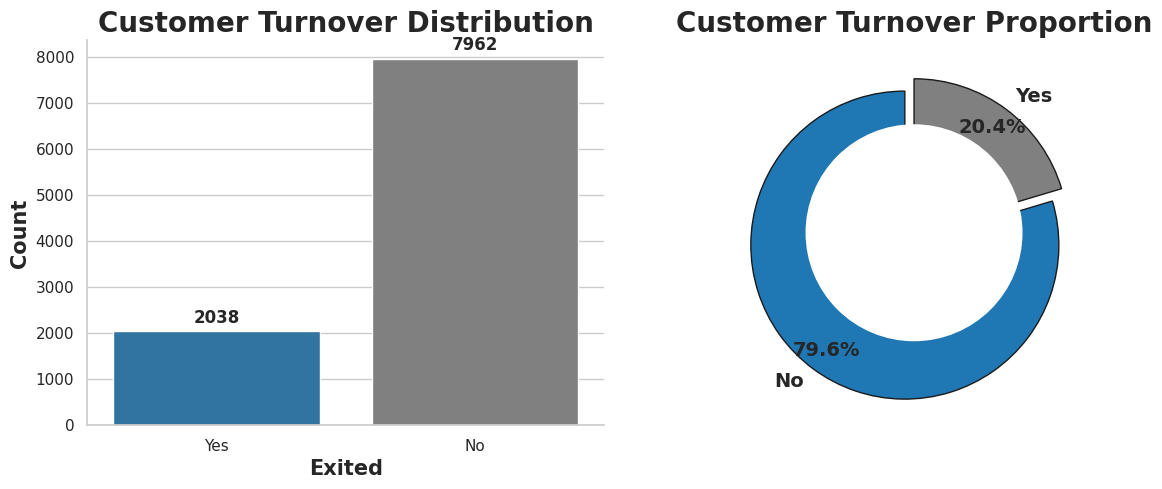

In [47]:
count = df["Exited"].value_counts()
professional_palette = ['#1f77b4', 'gray']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for Customer Exited Distribution
sns.countplot(ax=axes[0], x="Exited", data=df, palette=professional_palette)
axes[0].set_title("Customer Turnover Distribution", fontweight="bold", size=20)
axes[0].set_xlabel('Exited', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=15, fontweight='bold')
sns.despine(ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge', fontweight="bold", size=12, padding=3)


# Pie chart for Customer Exited Distribution
axes[1].pie(count, labels=['No', 'Yes'], autopct="%1.1f%%", colors=professional_palette,
            textprops={'fontsize': 14, 'fontweight': 'bold'}, startangle=90,
            explode=[0.1, 0], pctdistance=0.85, wedgeprops={"edgecolor": "k", 'linewidth': 1})
axes[1].set_title("Customer Turnover Proportion", fontweight="bold", size=20)
sns.despine(ax=axes[1])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.subplots_adjust(wspace=0.1)
plt.show()

##### **Insight:**



1.   The dataset shows a significant difference between the number of customers who have left the bank ("Yes") and those who have stayed ("No").
2.   The number of customers who stayed is greater, indicating an imbalance in the dataset.
3.   Further analysis is needed to understand the reasons behind customers' decisions to stay with or leave the bank.



####**2. Displaying Customer Turnover by Gender**

In [63]:
professional_palette = ['gray', '#1f77b4']

def countplot(column):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 5))
    ax = sns.countplot(x=column, data=df, hue="Exited", palette=professional_palette)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xlabel(column.replace('_', ' ').title(), fontsize=15, fontweight='bold')
    plt.ylabel('Count', fontsize=15, fontweight='bold')
    plt.xticks(rotation=0)
    plt.title(f"Customer Turnover by {column.replace('_', ' ').title()}", fontweight="bold", size=20, pad=20)

    for value in ax.patches:
        if value.get_height() > 0:
            percentage = '{:.1f}%'.format(100 * value.get_height() / len(df[column]))
            x = value.get_x() + value.get_width() / 2
            y = value.get_y() + value.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom', fontweight='bold', size=12)

    plt.legend(title='Exited', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

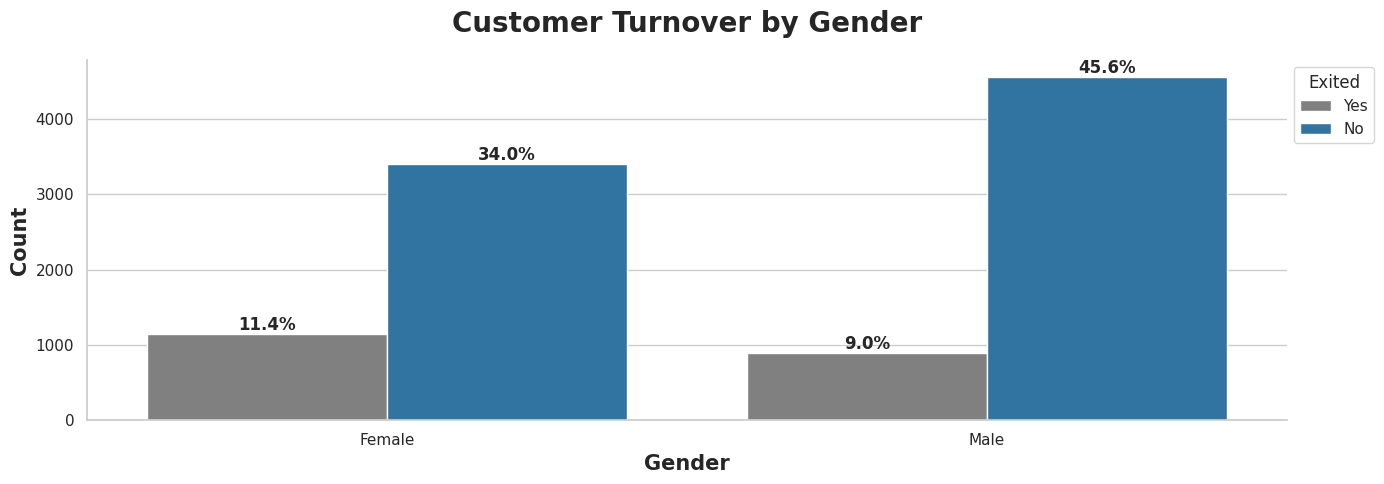

In [49]:
new_var = countplot("Gender")

##### **Insight:**

1.   According to the Gender bar graph above, female customer leading the percentage of turnover (11.4%) from the bank compared to male(9.0%).

##### **Recommendation:**


1.   **Customer Research**: Conduct surveys, focus groups, and interviews with female customers to understand their specific concerns, preferences, and needs. This research can reveal insights into why they may be more likely to turn from bank.
2.   **Monitoring and Feedback**: Regularly monitor the effectiveness of these strategies through ongoing feedback mechanisms and adjust them as necessary to ensure they continue to meet the needs of female customers effectively.



####**3. Displaying Customer Turnover by Number of Product**

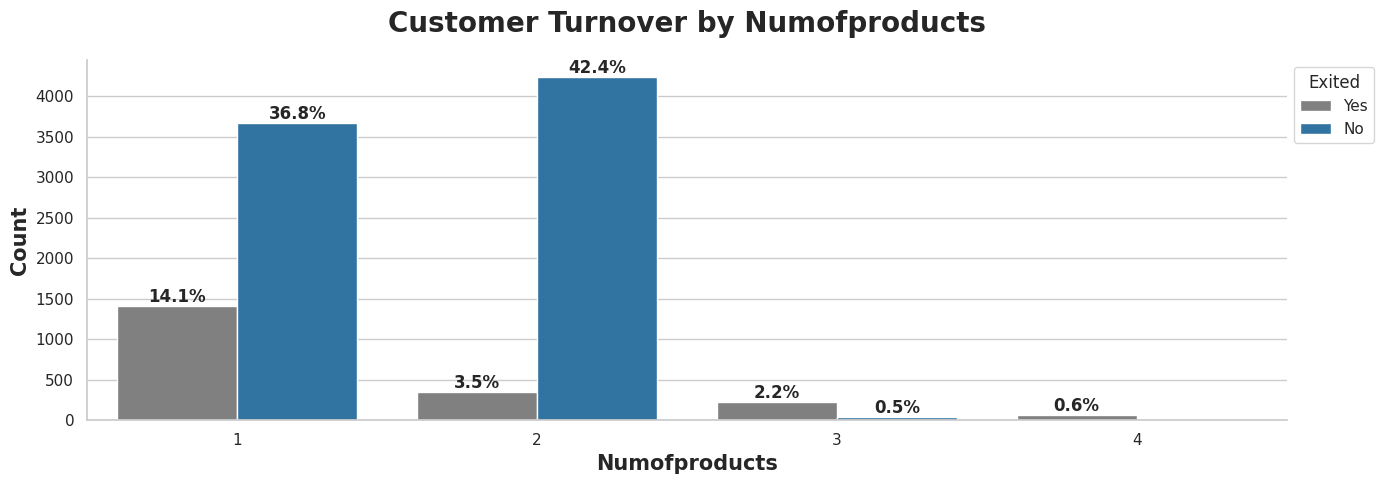

In [50]:
countplot("NumOfProducts")

##### **Note:**
Banks offer a wide range of products and services to meet the financial needs of their customers, ranging from basic banking services to more complex financial solutions. For example here's a list of products from Maybank (https://www.maybank.com/en/products-and-services.page):


1.   Wealth Management
2.   Insurance & Takaful
3.   Consume and Digital Solutions
4.   Etc..

##### **Insight:**

1.   The majority of customers hold either one or two products, while fewer customers have more than two products.
2.   The highest turnover occurs among customers with only one product.

##### **Recommendation:**


1.   **Customer Research**: Conduct surveys, focus groups, and interviews with female customers to understand their specific concerns, preferences, and needs. This research can reveal insights into why they may be more likely to turn from bank.
2.   **Monitoring and Feedback**: Regularly monitor the effectiveness of these strategies through ongoing feedback mechanisms and adjust them as necessary to ensure they continue to meet the needs of female customers effectively.

####**4. Displaying Customer Turnover by Active Member or Not**

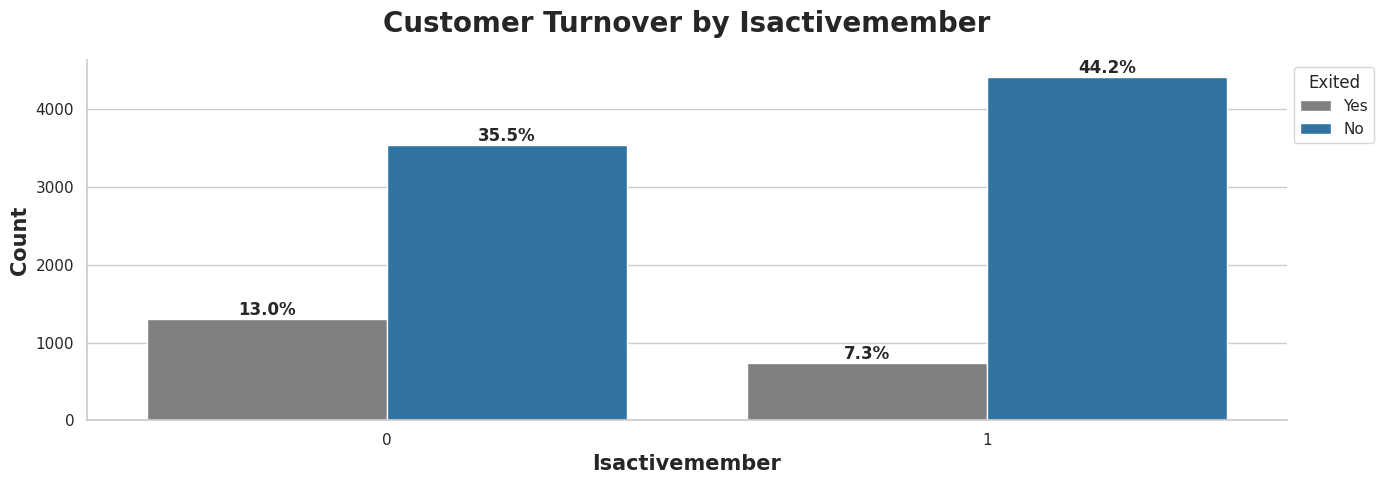

In [51]:
countplot("IsActiveMember")

##### **Insight:**


1.   IsActiveMember: Indicates active membership status (1 = Active, 0 = Inactive).
2.   Active members show a significantly lower turnover rate compared to inactive members, highlighting the importance of engagement in customer retention strategies.

##### **Recommendation:**
It is a loss if a bank loses its customer. Below are the few suggestions that can keep customer running away from a bank:


1.   Loyalty Programs: Implementing loyalty programs that reward customers for their business can increase retention. Rewards could be in the form of better rates, lower fees, or even non-banking perks.
2.   Community Engagement: Banks that actively engage with their community, such as sponsoring local events or supporting local businesses, can build goodwill and a strong local customer base.




####**5. Displaying Customer Turnover by Satisfaction Score**

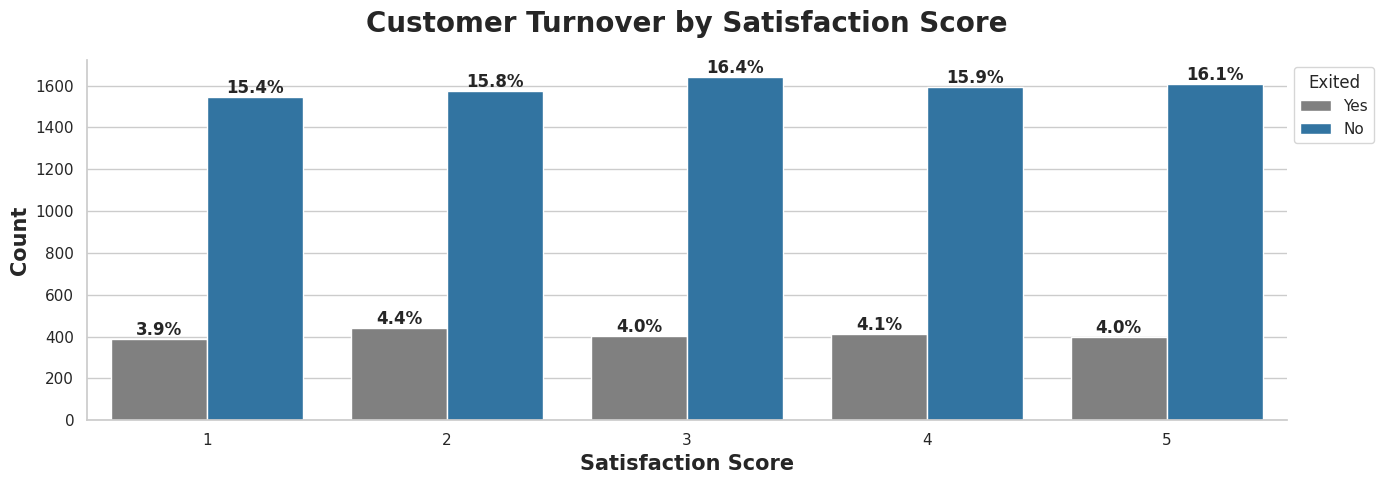

In [65]:
# Plotting for Satisfaction Score
countplot("Satisfaction Score")

The visualization for "Customer Turnover by Satisfaction Score" shows the distribution and impact of satisfaction scores on customer churn. The percentages indicate how each satisfaction score segment contributes to the overall customer churn and retention with score 5 is the perfect score and 1 is the lowest score.

##### **Insights**:

Satisfaction score of 2 appear to have higher churn rates, suggesting that less satisfied customers are more likely to leave. This relationship can guide strategies to improve customer retention by focusing on enhancing satisfaction levels.

####**6. Visualizing Customer Churned by Balance.**

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

def continuous_plot(column, data):
    professional_palette = ['gray', '#1f77b4']  # Setting the professional color palette

    plt.figure(figsize=(13, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column, hue="Exited", kde=True, palette=professional_palette)
    plt.title(f"Distribution of {column} by Turnover Status", fontweight="bold", pad=20, size=15)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Exited", y=column, data=data, palette=professional_palette)
    plt.title(f"Box Plot of {column} by Turnover Status", fontweight="bold", pad=20, size=15)

    plt.tight_layout()
    plt.show()




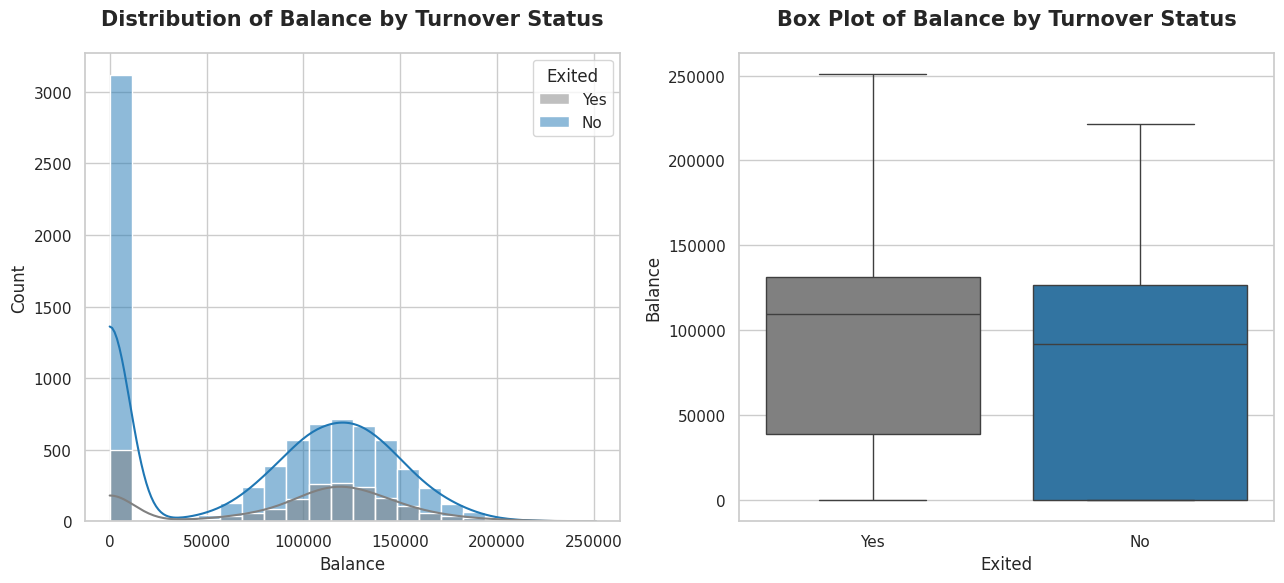

In [97]:
continuous_plot("Balance", df)

##### **Insights**:

Over 3,000 customers have a zero account balance. These customers are more likely to deactivate their accounts. When excluding zero values, the balance distribution approximates a normal distribution.

##### **Recommendations**:


1.   For customers with low or zero balances, strategies to engage them might be developed to prevent account dormancy and potentially convert them into more active, profitable customers.
2.   Analyzing the needs of different segments might reveal opportunities for new financial products or services, especially targeted at high-balance customers who show a higher propensity to turnover.



####**7. Visualizing Customer Turnover by Age.**

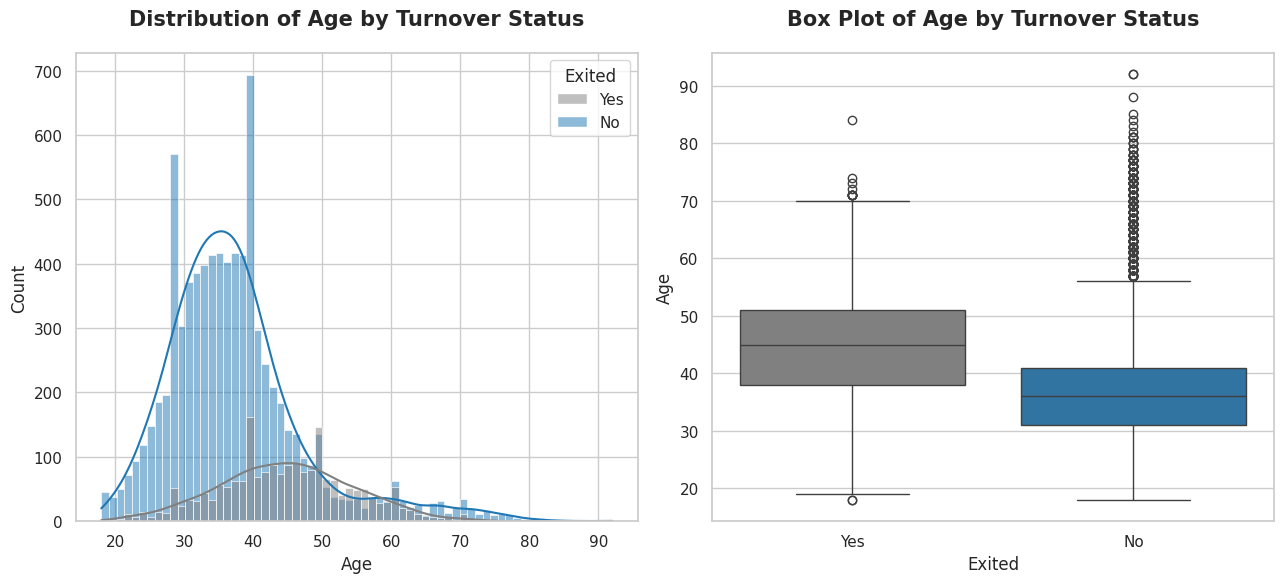

In [99]:
continuous_plot("Age", df)

##### **Insights**:



1.   Customers who exited are typically older than those who stayed. The distribution for those who exited is skewed towards older ages, while the distribution for those who stayed is more concentrated in the younger age range.
2.   Notably, the peak for customers who exited (Yes) is much higher around ages 45 to 60, suggesting this age group is at higher risk of churning.

1.   The median age of customers who exited is higher than those who stayed. This is evident from the position of the median line in each box.
2.   Customers who stayed have a narrower interquartile range (IQR), mostly concentrated between the ages of 30 and 40. In contrast, the age range for those who exited is broader, with a lower quartile near 40 and an upper quartile extending to around 55.





##**Data Preparation for Machine Learning**

In [ ]:
df["Exited"].replace({"No":0,"Yes":1},inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


##### **Insight:**

We have converted the 'Exited' values from 'Yes/No' back to '1/0'. This change will facilitate the upcoming steps in our machine learning process.

####**1. Correlation Matrix**

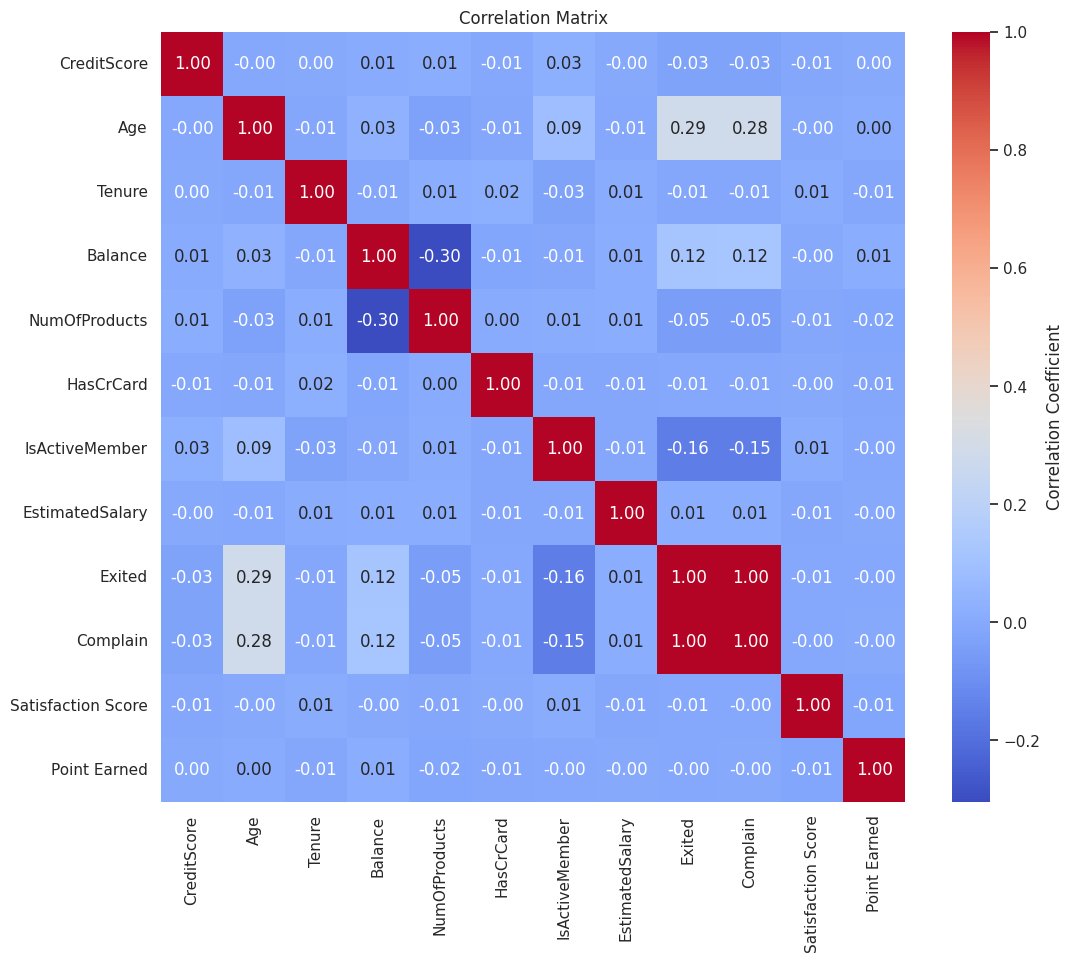

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 10))

# Drawing the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

##### **Insight:**
The correlation matrix above highlights several important relationships:


1.   **Age**: Shows a moderate positive correlation with Exited, suggesting that older customers are more likely to exit.
2.   **IsActiveMember**: Has a negative correlation with Exited, confirming that active members are less likely to leave.
3.   **Balance**: Has a small positive correlation, indicating a slight tendency for customers with higher balances to exit, which might be counterintuitive and warrants further investigation.
4.   **NumOfProducts**: Interestingly, there's a negative correlation here; customers with more products are slightly less likely to exit, which might suggest that diversified services could help in retention.



####**2. Encoding Categorical Columns and Splitting the Dataset**

In [ ]:
# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Geography', 'Gender', 'Card Type']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Splitting the dataset into training and testing sets
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 14), (2000, 14), (8000,), (2000,))

##### **Insight:**


1.   **Encoding Categorical Variables**: Convert categorical variables like Geography, Gender, and Card Type into a format that can be used by machine learning algorithms.
2.   **Data Splitting**: Split the dataset into a training set and a testing set. By splitting the data, we ensure that we're not just making a model that's good on paper but one that will actually work well when it's used in real applications.

**The training set includes 8,000 samples, and the testing set includes 2,000 samples, with 14 features in each.**


##**Machine Learning Technique**

####**Model Creation using Logistic Regression**

Logistic Regression is a type of statistical analysis used to predict the outcome of a variable that can be one of two types; 0 (no chance) & 1 (certain to happen)

In [ ]:
# Training Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy Score of Model on Test Data is =>", round(accuracy_logistic * 100, 2), "%")

report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)

# Since we're evaluating a binary classification, 'micro' average is equivalent to accuracy
# For binary classification, the following scores are typically calculated with the positive class (usually '1')
print("F1 Score of the Model is =>", f1_score(y_test, y_pred_logistic))
print("Recall Score of the Model is =>", recall_score(y_test, y_pred_logistic))
print("Precision Score of the Model is =>", precision_score(y_test, y_pred_logistic))

Accuracy Score of Model on Test Data is => 79.2 %
F1 Score of the Model is => 0.0956521739130435
Recall Score of the Model is => 0.05392156862745098
Precision Score of the Model is => 0.4230769230769231


##### **Insight:**

The Logistic Regression model achieved an accuracy of 79.2% on the test set. However, a closer look at the precision, recall, and F1-score reveals some important details:



1.   **Precision Score** for class 1 (exited) is relatively low at 42%, indicating that the model isn't very good at identifying exited customers accurately.
2.   **Recall** for class 1 is very low at 5%, meaning the model fails to identify a significant portion of the actual exited customers.
3.   **F1-score** for class 1 is also quite low at 10%, which combines precision and recall, indicating poor performance on the minority class.  

Logistic Regression seems to not be a best model for this data. Below is the Implication and Suggestions:

1.  **Class Imbalance**: One common reason for such results is class imbalance. Non-exited customer is more than exited customer. The model might be biased towards predicting the majority class (non-exited). It's worth checking the class distribution and considering techniques like SMOTE, adjusting class weights, or resampling to address imbalance.
2.   **Model and Variables Reassessment**: The current variables might not be strong indicators of the outcome, or logistic regression may not be the best model for this data. We will consider exploring other models like Random Forests or Gradient Boosting Machines (GBMs), which we will learn in near future.



####**Importance Variables in the Model Prediction**

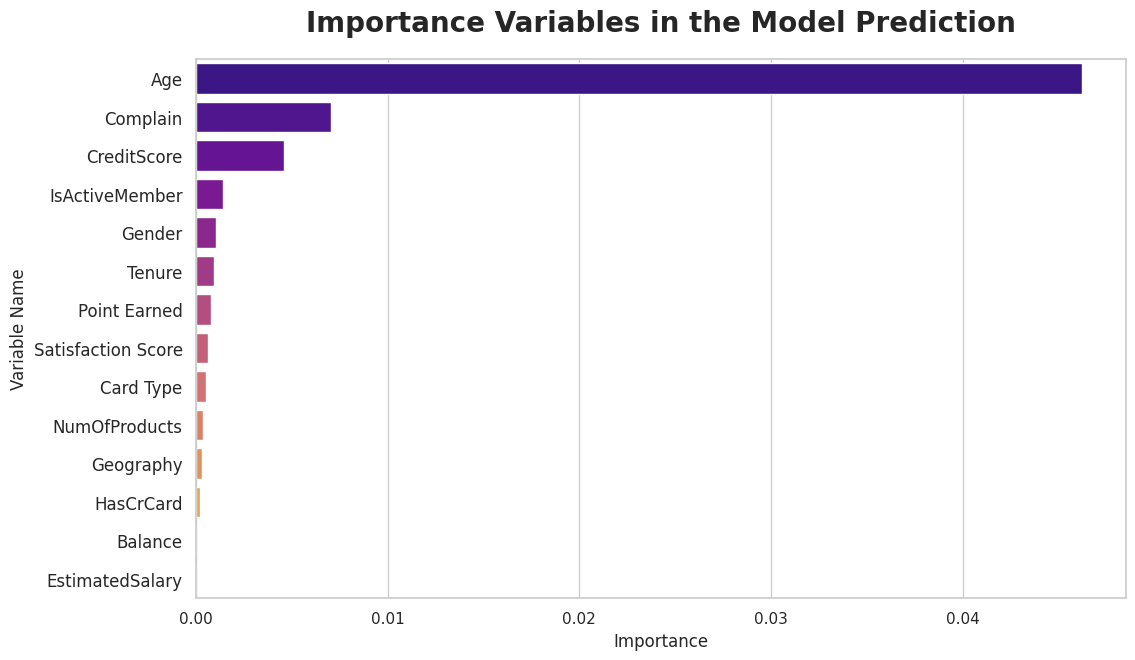

In [32]:
importance = logistic_model.coef_[0]

# Matching the Variables importance with the column names of the training data
features = X_train.columns
importance_df = pd.DataFrame({'Variable Name': features, 'Importance': importance})

# Since we want to visualize the absolute values of the importance
importance_df['Importance'] = np.abs(importance_df['Importance'])

# Sort the Variables by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizing the Importance Variables
plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Variable Name", data=importance_df, palette="plasma")
plt.title("Importance Variables in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

##### **Insight:**

1.   The key factors that significantly influence the deactivation of customers banking facilities are:-
Age, Complain, Credit Score and IsActiveMember
2.   The minimal impact of features on the deactivation of customers' banking facilities are:-
HasCrCard, Balance and EstimatedSalary



##**Conclusion**

####**Key-Points**

1.   **Model Performance**:
The logistic regression model provided a reasonable baseline performance with turnover customers, which is evident from the low recall and F1-score for the positive class.
2.   **Feature Importance**:
The feature importance analysis from the logistic regression model can provide insights into which factors are most influential in predicting customer turnover. Important features may include customer age, account balance, number of products, credit score, and activity level. Understanding these can help inform strategies to retain customers.
3.   **Business Insights**:
Active membership appears to be a strong indicator of retention, suggesting that efforts to engage customers could reduce turnover.
Older customers were more likely to turnover, highlighting a potential area to explore tailored retention strategies.
The presence of a credit card did not show a strong correlation with turnover, suggesting that simply having a credit card isn't a deciding factor in customer retention.

####**Strategic Recommendations**


1.   Investigate the reasons behind the turnover of older customers and consider offering products or services that might be more appealing to them.
2.   Enhance customer engagement and satisfaction, perhaps by improving customer service or offering loyalty programs, as active members are less likely to turnover.
3.  Consider a more detailed analysis of the customers with high balances who exited to understand if there are specific services or products that are not meeting their needs.

#*Side Note:*
The goal of this analysis is not only to predict turnover but also to understand its drivers so that targeted actions can be taken to reduce it. With these insights, a business can develop focused retention strategies to maintain a healthier customer base.

                                                    **Azlin**